In [187]:
# Computational imports
import numpy as np   # Library for n-dimensional arrays
import pandas as pd  # Library for dataframes (structured data)
# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")


In [116]:
df = pd.read_csv('/content/Kaggle_goldPriceData.csv')
pd.set_option('display.max_columns' ,None )
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [117]:
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
    print("DATA TYPES OF THE DATA: ")
    print(dataset.dtypes)
    print("-"*90)
    
data_feature(df)


SHAPE OF THE DATA: 
(2290, 6)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None
------------------------------------------------------------------------------------------
NUMBER OF NULL VALUES PRESENT IN THE DATA: 
Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64
------------------------------------------------------------------------------------------
COLUMN NAMES OF THE DATA: 
Index(['Date', 'SPX', 'GLD', 'USO', 'SLV

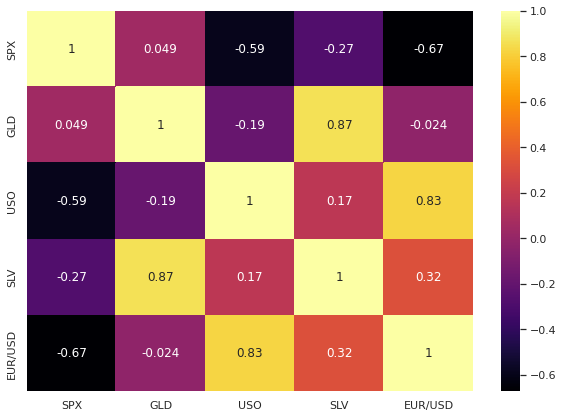

In [118]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

In [119]:
# Categorical variables :
cat_cols = [c for c in df.columns if df[c].dtypes=='O']
print(cat_cols)

print('*'*90)

# Numerical variables :
num_cols = [c for c in df.columns if df[c].dtypes!='O']
print(num_cols)


['Date']
******************************************************************************************
['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']


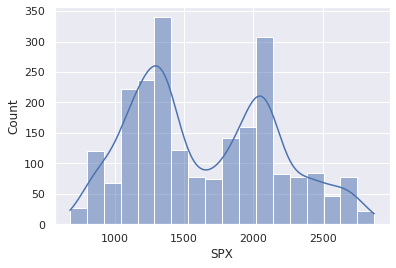

In [144]:
sns.histplot(data = df , x = 'SPX', kde = True);

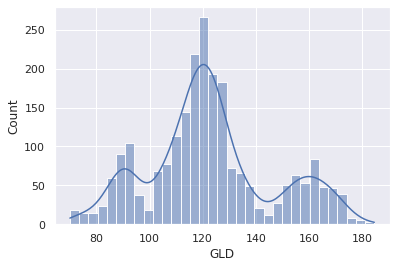

In [145]:
sns.histplot(data = df , x = 'GLD', kde = True);

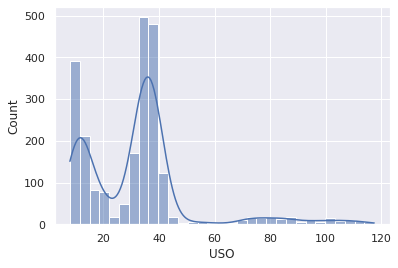

In [152]:
sns.histplot(data = df , x = 'USO', kde = True);

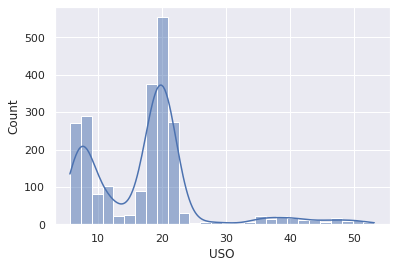

In [156]:
sns.histplot(data = df , x =(df['USO'])**(1/1.2), kde = True);

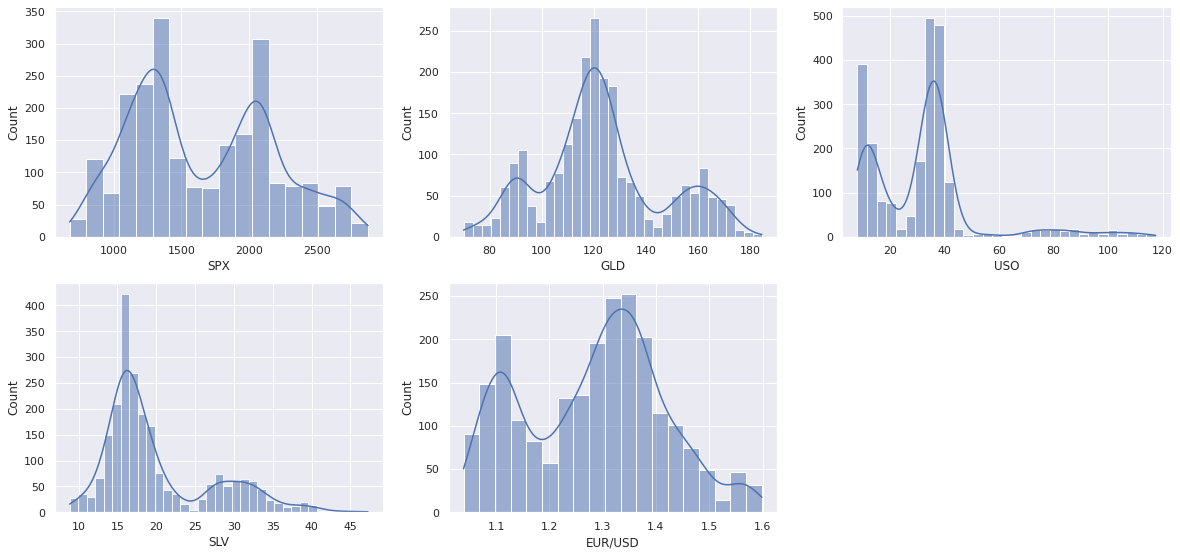

In [162]:
#plot a univariate distribution of numerical observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_col in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(data = df , x = df[num_col] , kde = True)
    plt.xlabel(num_col)
    plotnumber+=1
plt.show()

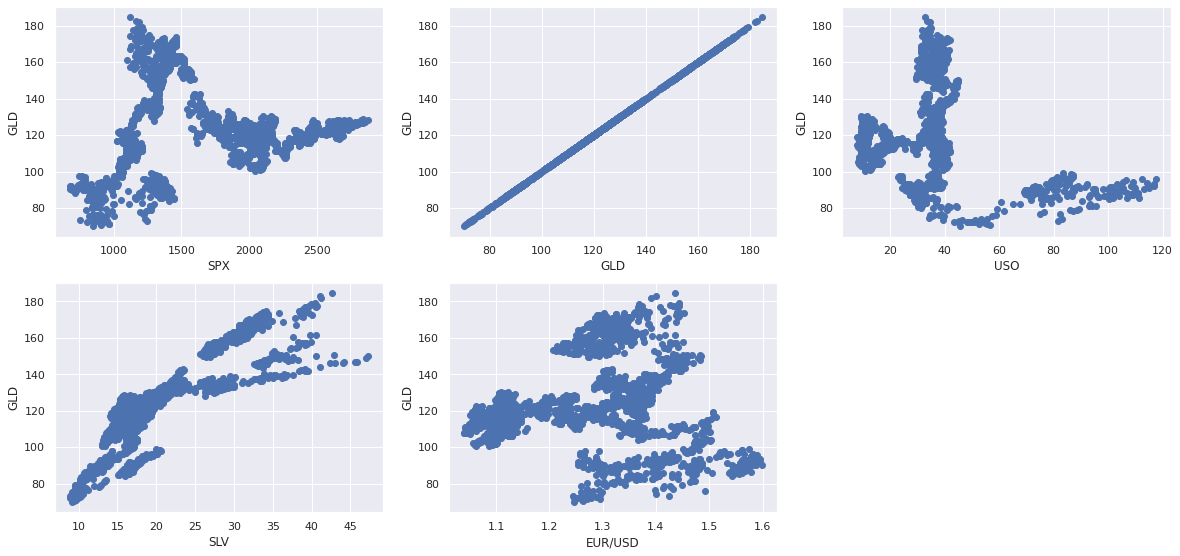

In [166]:

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_cols:
    data=df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    #plt.title(feature)
    plotnumber+=1
plt.show()

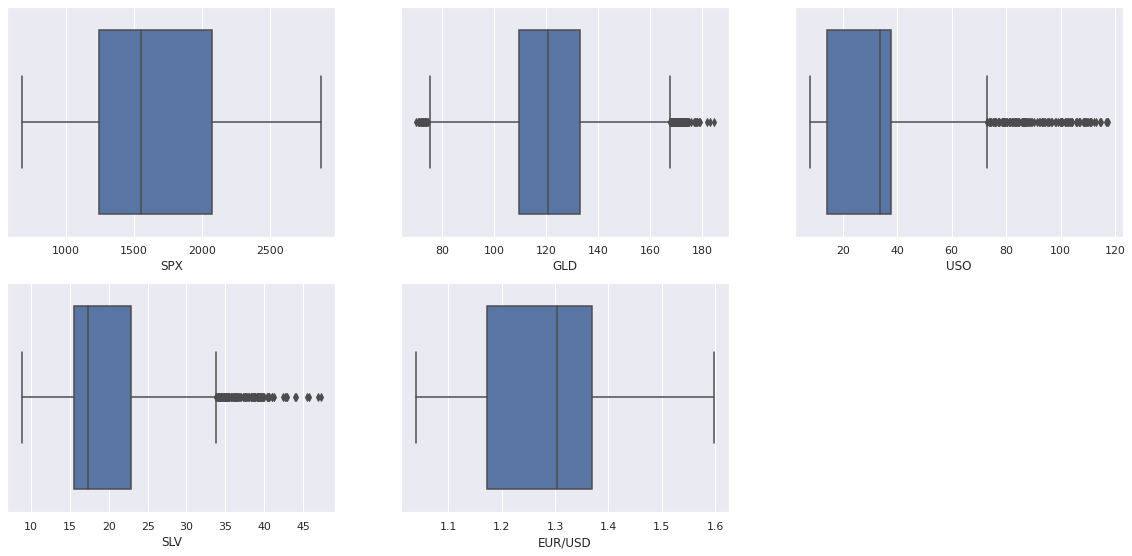

In [167]:
#boxplot on numerical features to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data = df , x = df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [169]:
df2=df.copy(deep = True)
df.shape , df2.shape

((2290, 6), (2290, 6))

In [170]:
# drop Date
df2.drop(['Date'],axis=1, inplace=True)

In [171]:
X = df2.drop(['GLD'],axis=1)
y = df2['GLD']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [172]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [185]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['mse'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBRegressor':{
        'model':XGBRegressor(objective ='reg:squarederror'),
        'params':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [2, 3],
            'n_estimators': [10, 50, 100, 200]
        }
    }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [186]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,decision_tree,0.981805,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
1,RandomForestRegressor,0.910696,"{'criterion': 'mse', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}"
2,XGBRegressor,0.984461,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}"


In [190]:
model_xgb = XGBRegressor(objective  = 'reg:squarederror',learning_rate=0.5, max_depth=3, n_estimators=200)

model_xgb.fit(X_train,y_train)

XGBRegressor(learning_rate=0.5, n_estimators=200, objective='reg:squarederror')

In [194]:
y_pred= model_xgb.predict(X_test)

In [195]:
y_pred

array([127.839714, 117.78003 , 139.86362 , 121.72129 ,  91.45914 ,
       150.29877 , 117.72737 , 112.97666 , 148.61874 , 105.00025 ,
       102.307045, 119.127556,  91.814926, 155.26105 , 121.58247 ,
       117.40806 ,  85.852165,  90.79795 ,  91.66415 , 124.19409 ,
        82.25381 , 118.25713 , 127.263794, 174.63809 , 173.54956 ,
       139.62447 , 114.931145, 160.5232  , 133.16188 , 115.47771 ,
       109.895065, 105.13089 , 129.16321 , 121.94389 , 101.23032 ,
       119.902405,  83.509834, 115.2284  , 126.30069 , 139.80621 ,
       108.75211 , 128.74837 , 101.58659 , 138.98744 , 135.0287  ,
       150.4273  , 118.71637 , 160.68329 , 150.95863 , 127.303375,
       117.543015, 114.32274 , 125.42216 , 118.27691 , 152.87804 ,
       124.0259  , 112.059265,  86.76845 , 155.93192 , 118.46649 ,
        87.29646 , 115.03043 ,  84.1512  , 146.00029 , 125.15785 ,
       127.68587 , 125.2775  , 120.90435 , 168.3814  , 122.42993 ,
       125.94005 , 173.56548 , 122.900635, 169.93297 , 118.110

In [196]:
model_xgb.score(X_test,y_test)

0.9875798991931406

In [197]:
Y_test = list(y_test)

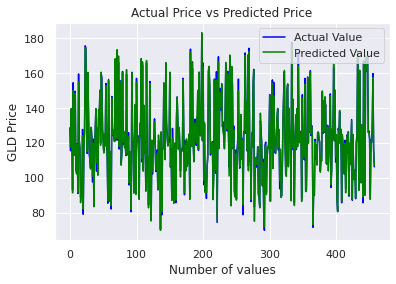

In [198]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()